# Introdução.

* A Rossmann opera mais de 3.000 drogarias em 7 países europeus. Atualmente, os gerentes de loja da Rossmann têm a tarefa de prever suas vendas diárias com até seis semanas de antecedência. As vendas da loja são influenciadas por muitos fatores, incluindo promoções, competição, feriados escolares e estaduais, sazonalidade e localidade. Com milhares de gerentes individuais prevendo vendas com base em suas circunstâncias únicas, a precisão dos resultados pode ser bastante variada.

# Descrição do projeto
* Os dados foram originalmente retirados de uma competição da Kaggle. Onde foram fornecidos os dados históricos de vendas de 1.115 lojas Rossmann. Onde conjuntos fornecidos foram:
* **train.csv** - historical data including Sales
* **test.csv** - historical data excluding Sales
* **store.csv** - supplemental information about the stores
* Esses datasets serão tratados para eliminar os seus dados faltantes, outliers e unir os conjuntos Train e store. Também será criado algumas variáveis para dar suporte nas análises que serão feitas.

# Descrição dos dados.

* Descrição dos dados.
 
 * **Id** - an Id that represents a (Store, Date) duple within the test set
 * **Store [T]** - a unique Id for each store
 * **Sales [T]** - the turnover for any given day (this is what you are predicting)
 * **Customers [T]** - the number of customers on a given day
 * **Open [T]** - an indicator for whether the store was open: 0 = closed, 1 = open
 * **StateHoliday [T]** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
 * **SchoolHoliday [T]** - indicates if the (Store, Date) was affected by the closure of public schools
 * **StoreType [S]** - differentiates between 4 different store models: a, b, c, d
 * **Assortment [S]** - describes an assortment level: a = basic, b = extra, c = extended
 * **CompetitionDistance [S]** - distance in meters to the nearest competitor store
 * **CompetitionOpenSince[Month/Year] [S]** - gives the approximate year and month of the time the nearest competitor was opened
 * **Promo [T]** - indicates whether a store is running a promo on that day
 * **Promo2 [S]** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
 * **Promo2Since[Year/Week] [S]** - describes the year and calendar week when the store started participating in Promo2
 * **PromoInterval [S]** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
 
 


# Funções

In [ ]:
#Funções.

def desc_df(df):
# Esta função descreve a estrutura do conjunto de dados utilizado, no caso ela informa sobre o conjunto de dados 
# o seu tamanho, o tipo de cada coluna e a porcentagem de dados faltantes para cada coluna.

  print('Sobre os tamanho do conjunto de dados')
  print('Número de Linhas: ', df.shape[0])
  print('Número de colunas:', df.shape[1],'\n')


  print('Tipos das colunas')
  print(df.dtypes,'\n')


  print('\n')
  print('Sobre os Dados faltantes')
  if np.sum(df.isnull().sum(axis = 0)/df.shape[1] == 0) == df.shape[1]:
    print('Não existe dados faltantes','\n')
  else:
    print('Não existe dados faltantes: \n',np.sum(df.isnull(),axis = 0)/df.shape[1] == 0,'\n')

def complete_data(dfe,col,data,flag,column):
  # Flag == 1, não trocar o nome da coluna
  # flag == 0, trocar o nome da coluna
  vetor = np.zeros(dfe.shape[0])
  ind   = np.where(dfe[col] == data)[0]
  vetor[ind] = 1
  if flag == 1:
      dfe[col] = vetor
  if flag == 0:
      dfe[column] = vetor
  return dfe 

# Instalando biblioteca

In [ ]:
!pip install inflection

# Biblioteca

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import inflection
import math
import datetime
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando os dados.

In [ ]:
store = pd.read_csv('/content/drive/My Drive/dados/time series/store.csv')
train = pd.read_csv('/content/drive/My Drive/dados/time series/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
print('Colunas existentes no arquivo train:', train.columns)

Colunas existentes no arquivo train: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
print('Colunas existentes no arquivo store:', store.columns)

Colunas existentes no arquivo store: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


* O dataset store tem as informações coletadas de negócios, no caso as informações dos períodos entre as promoções e abertura dos concorrentes. Por esse motivo esse dataset vai ser unido ao outro.

In [ ]:
df = pd.merge(train, store, how="left", on="Store")

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Estrutura dos dados.
* Nesta parte será visto qual é o tipo de cada coluna do dataset.
* Quantidade de dados únicos em cada variável.
* Intervalo de aquisição de cada amostra, e quando foi obtida a primeira amostra e a última. 
 
 
 


### Tipo de cada coluna.

Será visto se existem dados faltantes nos dados.
 


In [ ]:
desc_df(df)

Sobre os tamanho do conjunto de dados
Número de Linhas:  1017209
Número de colunas: 18 

Tipos das colunas
Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object 



Sobre os Dados faltantes
Não existe dados faltantes: 
 Store                         True
DayOfWeek                     True
Date                          True
Sales                         True
Customers     

* A coluna Date está como objeto, sendo assim o seu tipo passará a ser transformada para datetime.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# conferindo se realmete a coluna foi convertida de forma correta
print('Tipos das colunas')
print(df.dtypes,'\n')

Tipos das colunas
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object 



### Quantidade de dados únicos.

In [ ]:
print('Quantidade de dados unicos:')
for i in range(df.shape[1]):
    print(df.columns[i],':',len(df[df.columns[i]].unique()))

Quantidade de dados unicos:
Store : 1115
DayOfWeek : 7
Date : 942
Sales : 21734
Customers : 4086
Open : 2
Promo : 2
StateHoliday : 5
SchoolHoliday : 2
StoreType : 4
Assortment : 3
CompetitionDistance : 655
CompetitionOpenSinceMonth : 13
CompetitionOpenSinceYear : 24
Promo2 : 2
Promo2SinceWeek : 25
Promo2SinceYear : 8
PromoInterval : 4


### Intervalo de aquisição.

In [ ]:
print('Primeira data presente no dataset:',df['Date'][0])
print('Ultima data presente no dataset:',df['Date'][df.shape[0]-1])

Primeira data presente no dataset: 2015-07-31 00:00:00
Ultima data presente no dataset: 2013-01-01 00:00:00


* Os dados estão sendo obtidos a cada dia.
* Agora será visto se existe algum dia que não foi adquirido algum dado.

In [ ]:
diff = df['Date'].dt.day.diff()
diff.value_counts()

 0.0     1016267
-1.0         911
 30.0         17
 29.0         10
 27.0          3
Name: Date, dtype: int64

In [ ]:
dias_mes = []
for i in range(1,13):
  dias_mes.append(np.max(df['Date'].dt.day[df['Date'].dt.month == i]))

soma_dias = []

for i in range(1,13):
  soma_dias.append(np.sum(dias_mes[:i]))

vetor = np.zeros(df.shape[0])

for i in range(2,13):
  vetor[df['Date'].dt.month == i] = soma_dias[i -2]

df['Total_dias']= vetor + df['Date'].dt.day 

In [ ]:
df['Total_dias'][df['Date'].dt.year == 2014] = df['Total_dias'][df['Date'].dt.year == 2014] + df['Total_dias'][df['Date'].dt.year == 2013].unique()[0]
df['Total_dias'][df['Date'].dt.year == 2015] = df['Total_dias'][df['Date'].dt.year == 2015] + df['Total_dias'][df['Date'].dt.year == 2014].unique()[0]

In [ ]:
df['Total_dias'].diff().unique()

array([nan,  0., -1.])

In [ ]:
df['Date'].unique().shape[0] # Número de datas existente

942

* Pelos valores obtidos mostram que o intervalo entre as datas é de dia após dia.

# Renomeando as colunas.

In [ ]:
Colunas_nova = df.columns.tolist()
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, Colunas_nova))

In [ ]:
df.columns = cols_new

In [ ]:
print('Colunas novas:',df.columns)

Colunas novas: Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'total_dias'],
      dtype='object')


# Alinhando as datas


* Os datasets store e train foram alinhados pelo número das lojas. Por esse motivo a informação das colunas promo2_since_week,competition_open_since_year, promo_interval,competition_open_since_year,competition_open_since_month, estão alinhadas de forma errada com a coluna Date.
 
* Logo, o próximo passo é alinhar essas datas.



In [ ]:
df1 = df.copy()

### Compettion open sinse year end month


In [ ]:
print('competition open since year',df1['competition_open_since_year'].unique())
print('\n')
print('competition open since month',df1['competition_open_since_month'].unique())

competition open since year [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]


competition open since month [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]


In [ ]:
Copetion_nan_store = df1['store'][df1['competition_open_since_year'].isna()] # lojas que não tem comcorrentes
Copetion_store  = df1['store'][df1['competition_open_since_year'].isna() ==False ] # lojas que tem concorrentes

In [ ]:
df1.loc[Copetion_nan_store.index].head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,total_dias
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct",942.0
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",942.0
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN,942.0
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec",942.0
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct",942.0


In [ ]:
# conferindo se existe dados iguais em Copetion_nan_store e Copetion_store
np.intersect1d(Copetion_nan_store,Copetion_store)

array([], dtype=int64)

In [ ]:
df1.competition_open_since_year = df1.apply(lambda x: x["date"].year if math.isnan(x["competition_open_since_year"]) else x["competition_open_since_year"], axis=1)
df1.competition_open_since_month = df1.apply(lambda x: x["date"].month if math.isnan(x["competition_open_since_month"]) else x["competition_open_since_month"], axis=1)

In [ ]:
df1["competition_open_since_year"] = np.int64(df1["competition_open_since_year"])
df1["competition_open_since_month"] = np.int64(df1["competition_open_since_month"])

In [ ]:
vetor = np.zeros(df1.shape[0])
vetor[Copetion_store.index] = 1
df1['without_competition'] = vetor # marcando se a loja tem concorrente ou não.

### Promo2 sice year, week and promo_interval

In [ ]:
print('promo2 since year',df1['promo2_since_year'].unique())
print('\n')
print('promo2 since week',df1['promo2_since_week'].unique())

promo2 since year [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]


promo2 since week [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]


In [ ]:
df1["promo2_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan(x["promo2_since_year"]) else x["promo2_since_year"], axis=1)
df1["promo2_since_week"] = df1.apply(lambda x: x["date"].week if math.isnan(x["promo2_since_week"]) else x["promo2_since_week"], axis=1)

In [ ]:
df1["promo2_since_year"] = np.int64(df1["promo2_since_year"])
df1["promo2_since_week"] = np.int64(df1["promo2_since_week"])

In [ ]:
month_map = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
df1["month_map"] = df1["date"].dt.month.map(month_map)
df1["promo_interval"].fillna('a', inplace=True)
df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(",") else 0, axis=1)
df1 = df1.drop(columns = ['promo_interval','month_map'])

In [ ]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,total_dias,without_competition,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,942.0,1.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,942.0,1.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,942.0,1.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,942.0,1.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,942.0,1.0,0


# Dados faltantes
 
 


### CompetitionDistance

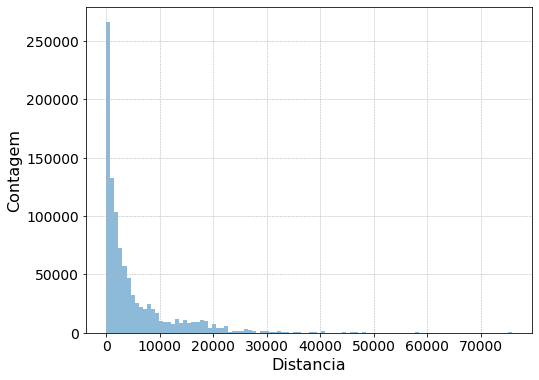

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.hist(df1['competition_distance'],bins = 100, alpha =0.5)
plt.xlabel('Distancia',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
df1["competition_distance"] = df1["competition_distance"].fillna(200000)

In [ ]:
# Vendo se os dados faltates acabaram
df1.isna().sum(axis =0)

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
total_dias                      0
without_competition             0
is_promo                        0
dtype: int64

# Dados objetos.

* Pode existir dados string que foram escritos de forma errada. Por esse motivo será visto se isso acontece.

In [ ]:
ind = df1.columns[df1.dtypes == 'object'] # variáveis string

* **StateHoliday [T]** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. 

* **StoreType [S]** - differentiates between 4 different store models: a, b, c, d.

* **Assortment [S]** - describes an assortment level: a = basic, b = extra, c = extended



In [ ]:
print('Variável', ind[0] ,':',df1[ind[0]].unique())
print('Variável', ind[1] ,':',df1[ind[1]].unique())
print('Variável', ind[2] ,':',df1[ind[2]].unique())

Variável state_holiday : ['0' 'a' 'b' 'c' 0]
Variável store_type : ['c' 'a' 'd' 'b']
Variável assortment : ['a' 'c' 'b']


* A variável **state_holiday** teve a informação 0 escrita de duas  maneiras diferentes. As demais não tiveram nenhum erro na sua escrita, por esse motivo ela é única variável que vai ser formatada.

In [ ]:
df1.loc[df1[ind[0]] == 0,ind[0]] = '0'

In [ ]:
df1[ind[0]].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

* Reescrevendo as variáveis para mudar o significado da legenda.

In [ ]:
df1["assortment"]    = df1["assortment"].apply(lambda x: "basic" if x == "a" else "extra" if x == "b" else "extended")
df1["state_holiday"] = df1["state_holiday"].apply(lambda x: "public_holiday" if x == "a" else "easter_holiday" if x == "b" else "christmas" if x == "c" else "regular_day")

# Criação de variáveis.
 
* Como se trata de dados temporais, algumas variáveis básicas podem capturar o efeito da sazonalidade.

In [ ]:
df2 = df1.copy()

In [ ]:
#df2[ind[0]].unique()

In [ ]:
df2["year"]       = df2["date"].dt.year  # ano
df2["month"]      = df2["date"].dt.month # mês
df2["day"]        = df2["date"].dt.day   # dia
df2['week_year']  = df2["date"].dt.isocalendar().week # Semana do ano

In [ ]:
print('Year',df2['year'].unique())
print('Month',df2['month'].unique())
print('Day',df2['day'].unique())
print('week year',df2['week_year'].unique())

Year [2015 2014 2013]
Month [ 7  6  5  4  3  2  1 12 11 10  9  8]
Day [31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
week year <IntegerArray>
[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 52, 51, 50, 49, 48, 47, 46,
 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32]
Length: 52, dtype: UInt32


* Algumas outras variáveis temporais também serão criadas.
 * Como a diferença temporal entre amostra e abertura do competidor.
 * Tempo que a loja operou sem a promoção2.
 
 


In [ ]:
df2["competition_since"] = df2.apply(lambda x: datetime.datetime(year=x["competition_open_since_year"], month=x["competition_open_since_month"], day=1), axis=1)

In [ ]:
df2["competition_time_month"] = ((df2["date"] - df2["competition_since"]) / 30)
df2['competition_time_month'] = df2["competition_time_month"].dt.days

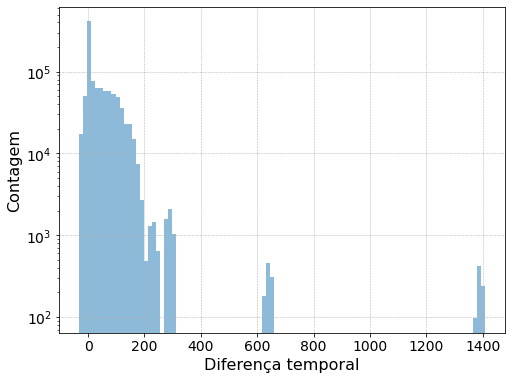

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.hist(df2['competition_time_month'],bins = 100, alpha =0.5)
plt.xlabel('Diferença temporal',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.semilogy()
plt.show()

* Os dados negativos representam as lojas que o concorrente abriu depois do primeiro dia de aquisição.
* No caso o valor -1 representa que a loja operou 1 mês sem ter um concorrente aberto.
 
* Agora será visto de fato a distribuição apenas para as lojas que de fato têm algum concorrente perto.
 
 


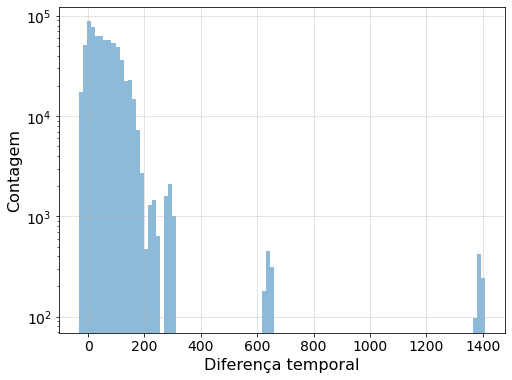

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.hist(df2['competition_time_month'][df2['without_competition'] == 1],bins = 100, alpha =0.5)
plt.xlabel('Diferença temporal',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.semilogy()
plt.show()

* Criando variáveis para computar o tempo sem promoção.

In [ ]:
df2["promo_since"]     = df2["promo2_since_year"].astype(str) + "-" + df2["promo2_since_week"].astype(str)
df2["promo_since"]     = df2["promo_since"].apply(lambda x: datetime.datetime.strptime(x + "-1", "%Y-%W-%w") - datetime.timedelta(days=7))
df2["promo_time_week"] = ((df2["date"] - df2["promo_since"]) / 7)
df2["promo_time_week"] = df2["promo_time_week"].dt.days


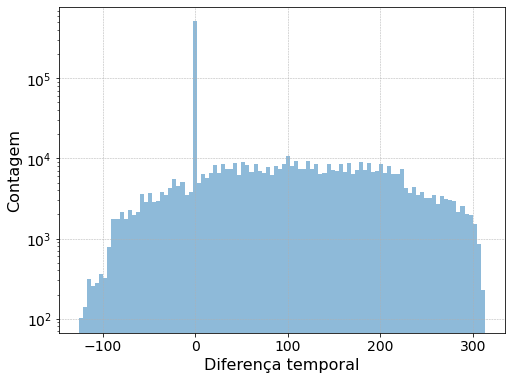

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.hist(df2['promo_time_week'],bins = 100, alpha =0.5)
plt.xlabel('Diferença temporal',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.semilogy()
plt.show()

* Removendo as lojas que não entraram na promoção2

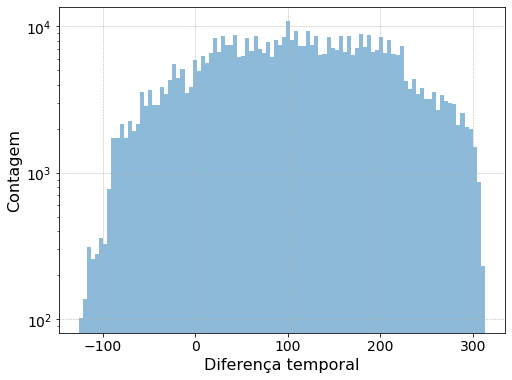

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.hist(df2['promo_time_week'][df2['promo2'] == 1],bins = 100, alpha =0.5)
plt.xlabel('Diferença temporal',fontsize = 16)
plt.ylabel('Contagem',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)
plt.semilogy()
plt.show()

* Os dados negativos representam as lojas aderiu a promoção2 depois da primeira data de aquisição.
 
* No caso o valor -1 representa que a loja operou 1 semana sem ter um concorrente aberto.
 
 
 


In [ ]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,total_dias,without_competition,is_promo,year,month,day,week_year,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,942.0,1.0,0,2015,7,31,31,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,942.0,1.0,1,2015,7,31,31,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,942.0,1.0,1,2015,7,31,31,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,942.0,1.0,0,2015,7,31,31,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,942.0,1.0,0,2015,7,31,31,2015-04-01,4,2015-07-27,0


# Store
 
* O objetivo é prever os dados há 6 semanas no futuro dia a dia, logo se existir lojas fechadas no último período pode significar que essas lojas estão fechadas permanentemente.
 
* Por esse motivo será visto se isso de fato acontece.


In [ ]:
df3 = df2.copy()

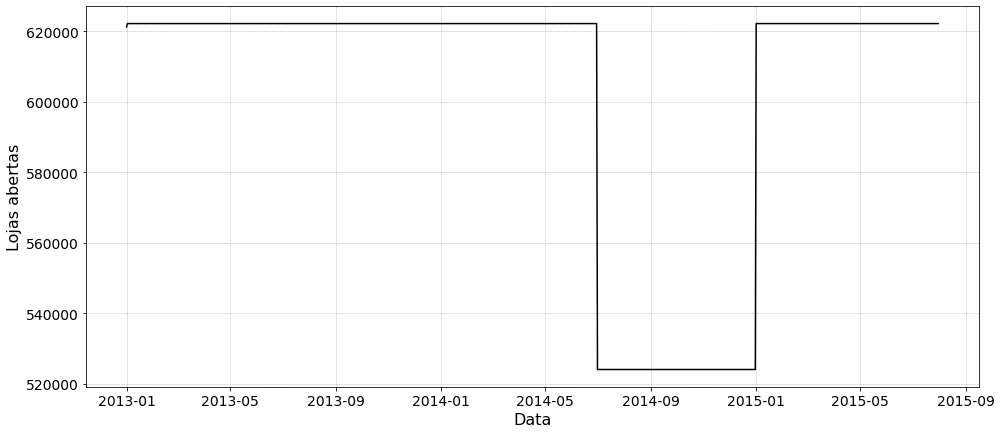

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(16,7))
plt.plot(df3.groupby('date').store.sum(),color ='Black')
plt.xlabel('Data',fontsize = 16)
plt.ylabel('Lojas abertas',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)

* Aconteceu um aumento de lojas depois do primeiro dia.
 * Isso pode dizer que o número de lojas aumentou a partir desse dia. Por esse motivo esse dia será excluído.
 
 


In [ ]:
df3 = df3[df3['date'] >'2013-01-02']
df3.index = np.arange(df3.shape[0])

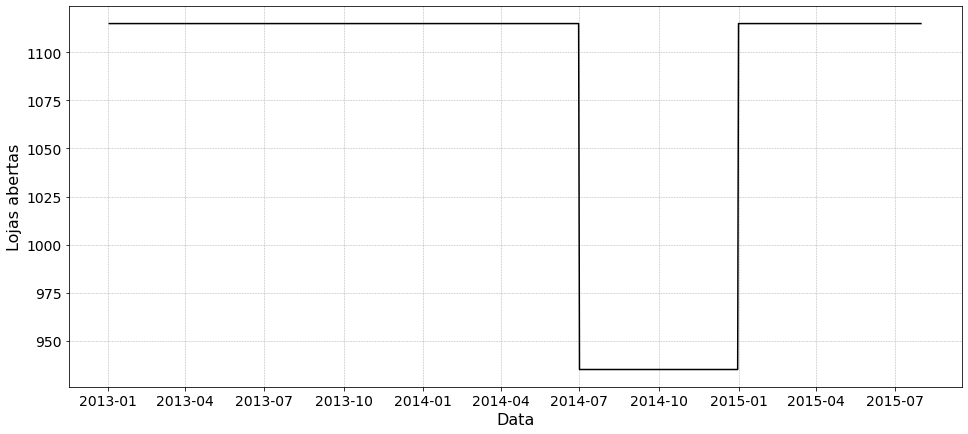

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(16,7))
plt.plot(df3.groupby('date').store.count(),color ='Black')
plt.xlabel('Data',fontsize = 16)
plt.ylabel('Lojas abertas',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)

* Existe um intervalo considerável que um número de lojas foram fechadas por um período considerável. Por esse motivo será visto de mais perto os valores do gráfico.
 
 
 


In [ ]:
print('Valores presentes no grafico:',df3.groupby('date').store.count().unique())

Valores presentes no grafico: [1115  935]


* De fato, foi apenas entre o período 2014-07 a 2015-01 que ficou fechado algumas lojas.

In [ ]:
print('Total de lojas que foram fechadas entre 2014-07 a 2015-01:',1115 - 935)

Total de lojas que foram fechadas entre 2014-07 a 2015-01: 180


* Os resultados deixam claro que aconteceu algum tipo de intervenção nas datas citadas que alterou o funcionamento de algumas lojas.
* Pelas informações disponíveis não dá para saber o motivo dessa alteração, mas só sabe que aconteceu essa mudança em um intervalo de dias específicos. Como não tem como modelar este fenômeno que aconteceu nessas lojas. Os dados delas não serão considerados para este projeto até que se saiba o motivo que fez gerar esse fenômeno.
 
 
 


In [ ]:
df_aux = df3.groupby('date').store.count().to_frame()

In [ ]:
print('Datas do decaimento das lojas:',df_aux[df_aux['store']< 1115].index[0],'e',df_aux[df_aux['store']< 1115].index[-1])

Datas do decaimento das lojas: 2014-07-01 00:00:00 e 2014-12-31 00:00:00


* Vendo  quais foram as lojas que ficaram fechadas nesse período.

In [ ]:
df_aux = df3[(df3['date'] >='2014-07-01') & (df3['date'] <='2014-12-31')]

In [ ]:
vet = np.in1d(df3['store'].unique(),df_aux['store'].unique() , invert=True)

In [ ]:
print('lojas que ficaram fechdas:',df3['store'].unique()[vet])

lojas que ficaram fechdas: [  13   20   22   32   36   41   46   51   52   58   72   76   81   89
   99  100  108  113  115  127  129  132  136  137  139  144  145  149
  155  159  164  165  172  174  181  183  186  190  191  192  204  215
  218  231  243  258  263  275  277  279  283  284  287  288  298  306
  317  342  345  348  365  385  399  407  412  413  420  427  428  429
  430  434  457  471  477  485  490  492  498  500  501  512  514  518
  522  534  539  540  542  547  555  571  573  575  587  598  604  611
  612  619  620  629  633  636  637  638  644  646  650  660  669  670
  671  677  684  694  701  702  706  710  711  712  716  719  736  739
  744  750  766  771  775  778  797  804  805  806  815  820  825  842
  851  858  859  879  884  890  893  900  902  903  904  909  915  919
  920  932  941  952  974  977  989 1000 1004 1009 1012 1019 1027 1038
 1041 1049 1056 1065 1067 1080 1092 1094 1102 1104 1107 1109]


* Essas lojas seram excluidas

In [ ]:
store = df3['store'].unique()[vet]
for i in range(len(store)):
  df3 = df3.drop(df3[df3['store'] == store[i]].index.values)

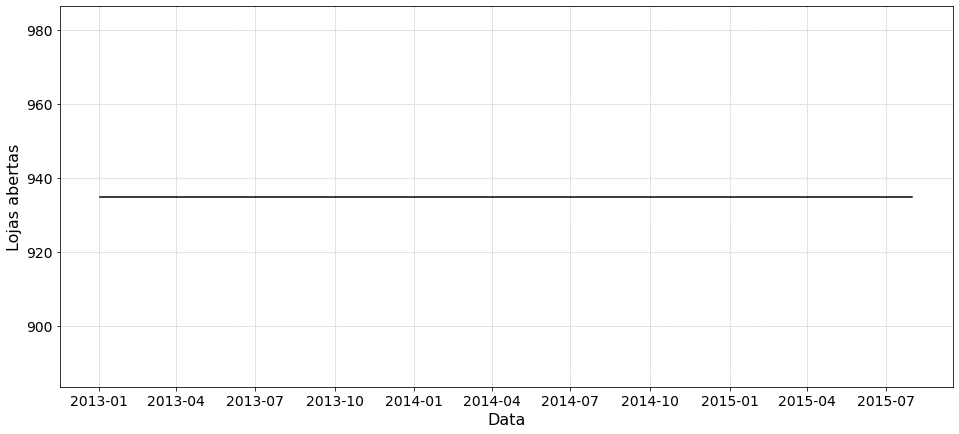

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(16,7))
plt.plot(df3.groupby('date').store.count(),color ='Black')
plt.xlabel('Data',fontsize = 16)
plt.ylabel('Lojas abertas',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)

# Open

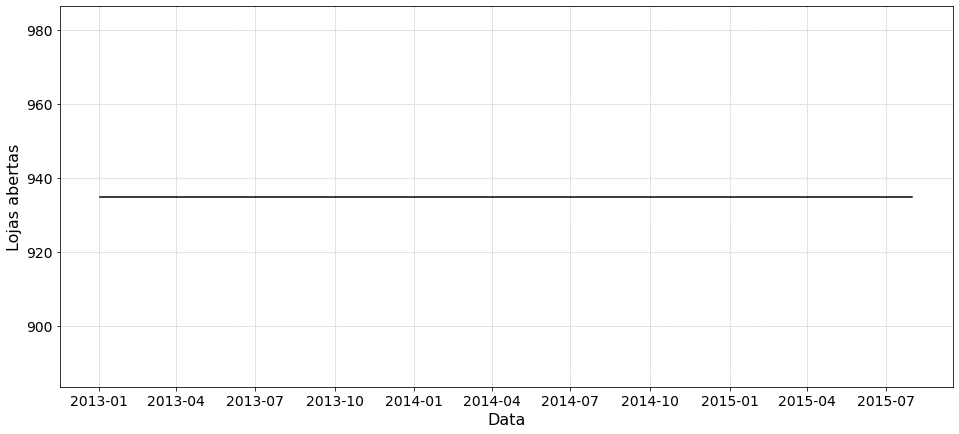

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(16,7))
plt.plot(df3.groupby('date').open.count(),color ='Black')
plt.xlabel('Data',fontsize = 16)
plt.ylabel('Lojas abertas',fontsize = 16)
plt.grid(linestyle='--', linewidth=0.5)

* Como os dias que as lojas ficaram fechados não ha nenhuma venda. Os seus dados serão removidos para que eles não interfiram nas análises.
 
* E vale destacar que para estimar o valor de uma loja fechada basta utilizar uma condição. Logo, não faz sentido usar essa informação no modelo.


# Formatação final do dataset

In [ ]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,total_dias,without_competition,is_promo,year,month,day,week_year,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,942.0,1.0,0,2015,7,31,31,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,942.0,1.0,1,2015,7,31,31,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,942.0,1.0,1,2015,7,31,31,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,942.0,1.0,0,2015,7,31,31,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,942.0,1.0,0,2015,7,31,31,2015-04-01,4,2015-07-27,0


In [ ]:
col = ['total_dias','competition_since','promo_since']

In [ ]:
df3 = df3.drop(columns = col)

# Nova estrutura.

In [ ]:
desc_df(df3)

Sobre os tamanho do conjunto de dados
Número de Linhas:  878900
Número de colunas: 25 

Tipos das colunas
store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
without_competition                    float64
is_promo                                 int64
y

# Conclusão.
 
* Foram criadas mais 7 novas novas variáveis.
* Os dados faltantes foram devidamente tratados.


# Refêrencias.

* https://github.com/juniorcl/rossman-store-sales.
* https://www.kaggle.com/c/rossmann-store-sales.

# Salvando o novo dataset

In [ ]:
df3.to_csv('/content/drive/My Drive/dados/time series/dados_novos')

In [ ]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,without_competition,is_promo,year,month,day,week_year,competition_time_month,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,1.0,0,2015,7,31,31,84,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1.0,1,2015,7,31,31,94,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1.0,1,2015,7,31,31,105,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,1.0,0,2015,7,31,31,71,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,1.0,0,2015,7,31,31,4,0
